## This notebook demos Python data visualizations on the Iris dataset

This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the [kaggle/python docker image](https://github.com/kaggle/docker-python)

We'll use three libraries for this tutorial: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Text(0, 0.5, 'No of samples')

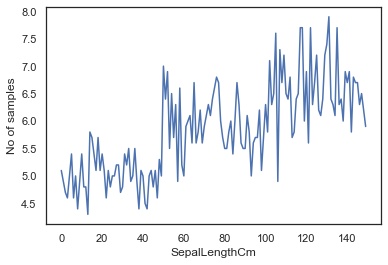

In [3]:
#Plot
plt.plot(iris.SepalLengthCm)
plt.xlabel("SepalLengthCm")
plt.ylabel("No of samples")

Text(0, 0.5, 'No of samples')

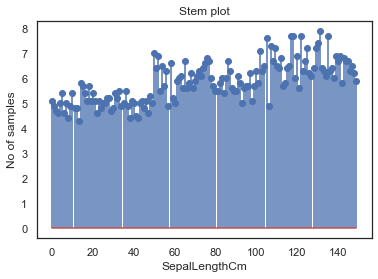

In [4]:
# Stem
plt.stem(iris.SepalLengthCm)
plt.title("Stem plot")
plt.xlabel("SepalLengthCm")
plt.ylabel("No of samples")

Text(0, 0.5, 'No. of Samples')

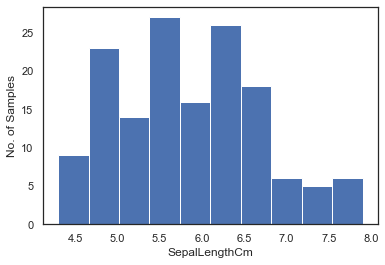

In [5]:
#Histogram
plt.hist(data=iris, x="SepalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("No. of Samples")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

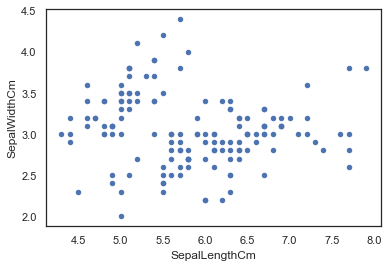

In [6]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

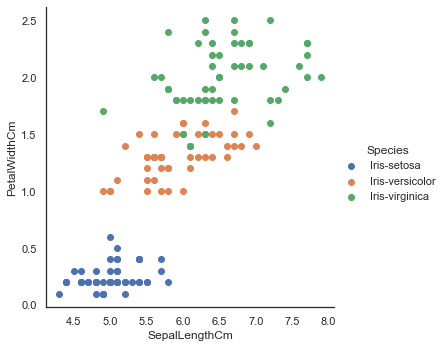

In [15]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "PetalWidthCm") \
   .add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

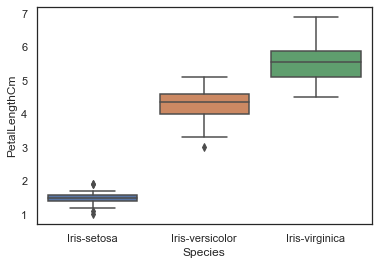

In [100]:
sns.boxplot(data=iris, x="Species", y="PetalLengthCm")

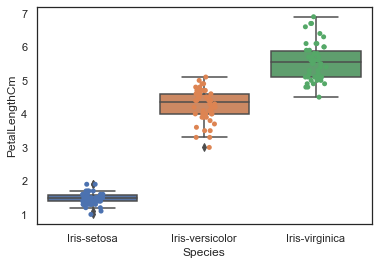

In [99]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

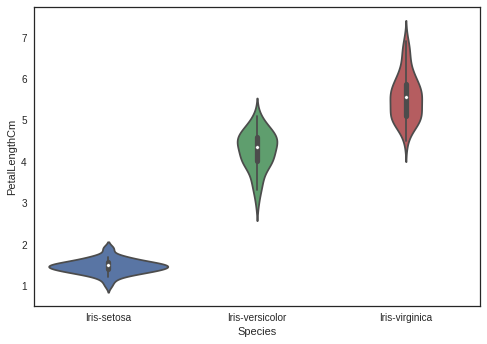

In [8]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

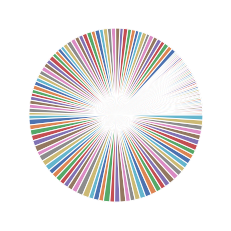

In [76]:
plt.show(plt.pie(iris.PetalLengthCm))

<AxesSubplot:>

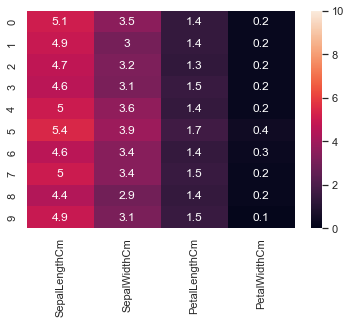

In [101]:
sns.heatmap(iris.iloc[0:10,1:-1], annot=True, vmin=0, vmax=10)

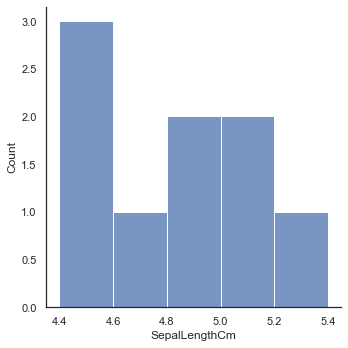

In [105]:
sns.displot(iris.iloc[1:10,1:-1], x="SepalLengthCm")

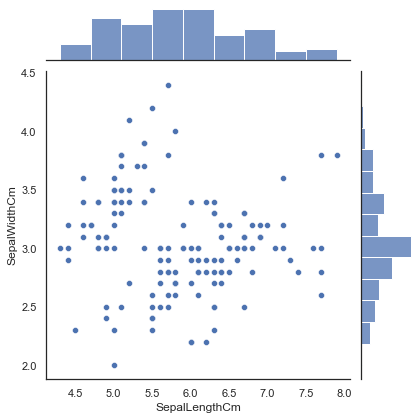

In [103]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris)

<AxesSubplot:xlabel='SepalLengthCm'>

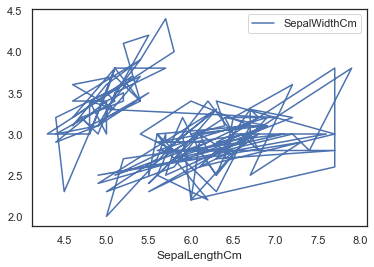

In [35]:
#Line plot
iris.plot(kind="line", x="SepalLengthCm", y="SepalWidthCm")

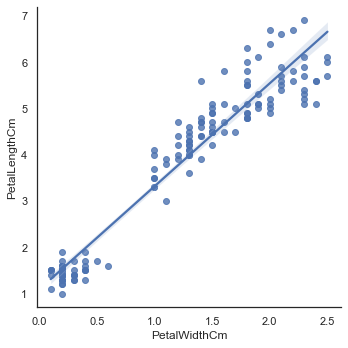

In [81]:
#LM Plot

sns.lmplot(data=iris.iloc[:,1:-1], x="PetalWidthCm", y="PetalLengthCm")

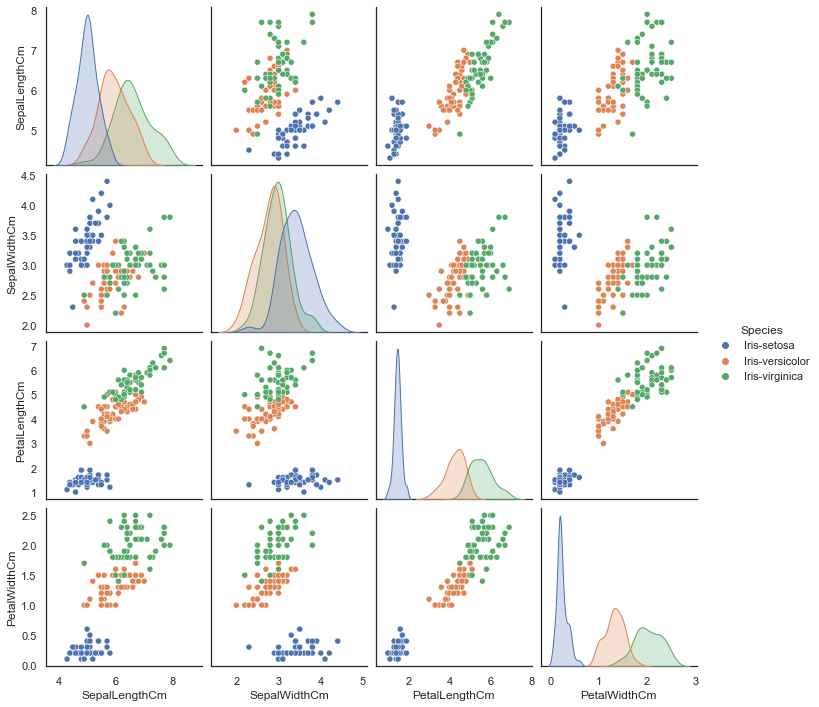

In [85]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='count'>

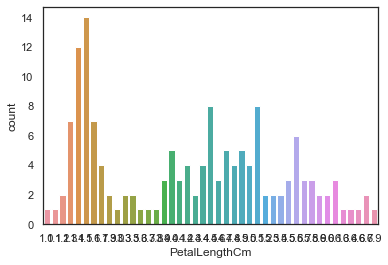

In [87]:
sns.countplot(data=iris, x="PetalLengthCm")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

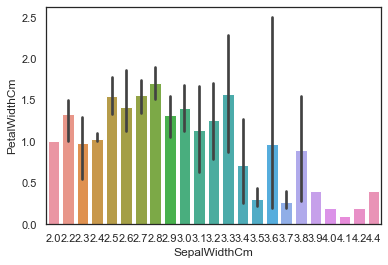

In [90]:
sns.barplot(data=iris, x="SepalWidthCm", y="PetalWidthCm")

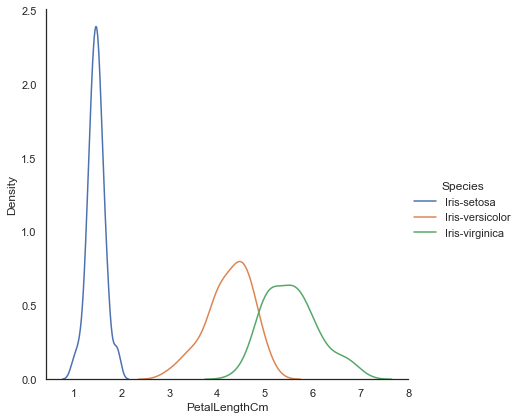

In [91]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
# RidgeLine plot
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

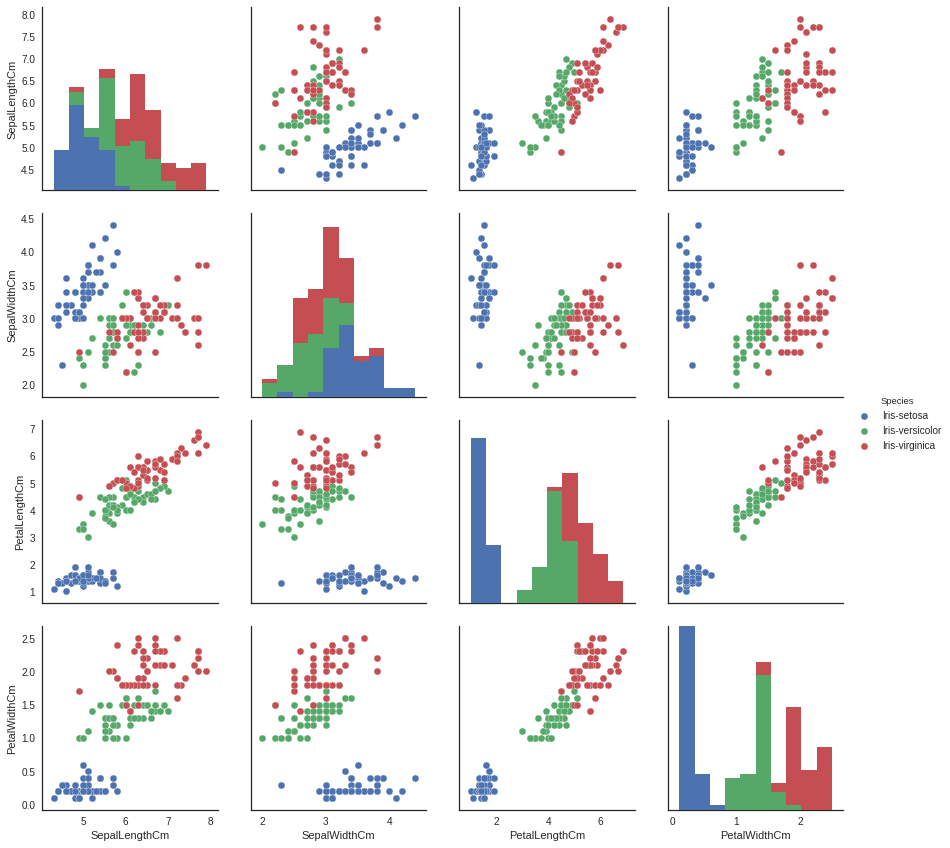

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

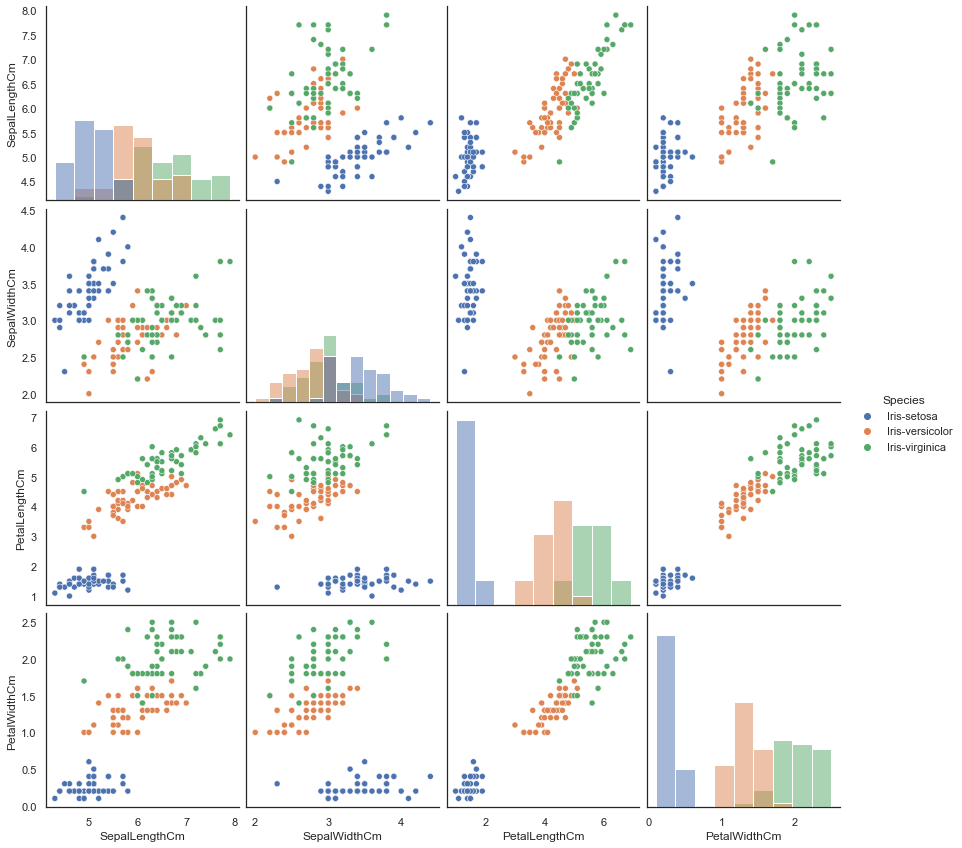

In [115]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="hist")